Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.3111 - accuracy: 0.9077 - val_loss: 0.1298 - val_accuracy: 0.9608
Epoch 2/10
 - 5s - loss: 0.1313 - accuracy: 0.9609 - val_loss: 0.0987 - val_accuracy: 0.9692
Epoch 3/10
 - 5s - loss: 0.0995 - accuracy: 0.9703 - val_loss: 0.0780 - val_accuracy: 0.9765
Epoch 4/10
 - 5s - loss: 0.0826 - accuracy: 0.9750 - val_loss: 0.0732 - val_accuracy: 0.9781
Epoch 5/10
 - 5s - loss: 0.0716 - accuracy: 0.9780 - val_loss: 0.0696 - val_accuracy: 0.9787
Epoch 6/10
 - 5s - loss: 0.0634 - accuracy: 0.9810 - val_loss: 0.0657 - val_accuracy: 0.9804
Epoch 7/10
 - 5s - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0591 - val_accuracy: 0.9814
Epoch 8/10
 - 5s - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.0564 - val_accuracy: 0.9818
Epoch 9/10
 - 5s - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0587 - val_accuracy: 0.9818
Epoch 10/10
 - 5s - loss: 0.0465 - accuracy: 0.9863 - val_loss: 0.0536 - val_accuracy: 0.9829
Error After Dropout

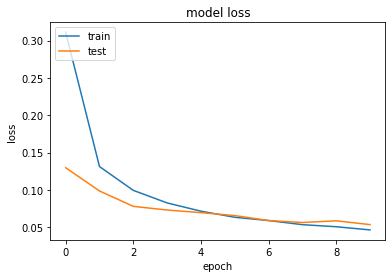

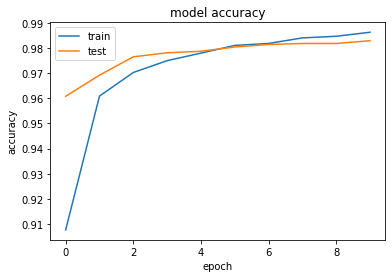

In [14]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import adam
from keras.layers import Dropout
from keras.constraints import maxnorm 
from keras.optimizers import SGD

seed=7
numpy.random.seed(seed)

#load data
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()


num_pixel=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixel).astype('float32')
X_test=X_test.reshape(X_test.shape[0],num_pixel).astype('float32')


X_train=X_train/255
X_test=X_test/255

Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)
num_classes=Y_test.shape[1]

def baseline_model():
  model=Sequential()
  model.add(Dropout(0.2,input_shape=(num_pixel,)))
  model.add(Dense(num_pixel,input_dim=num_pixel,activation='relu',kernel_constraint=maxnorm(3)))
  model.add(Dense(num_classes,activation='softmax',kernel_constraint=maxnorm(3)))


  sgd=SGD(lr=0.1,momentum=0.9,decay=0.0,nesterov=False)
  model.compile(loss='categorical_crossentropy',optimizer=sgd ,metrics=['accuracy'])

  return model

model=baseline_model()
# history=model.fit(X_train,Y_train,validation_split=0.33,nb_epoch=10,batch_size=200,verbose=2)
# print(history.history.keys())
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=200,verbose=2)
scores=model.evaluate(X_test,Y_test,verbose=0)
print("Error After Dropout: %.2f%%" %(100-scores[1]*100))

fig1=plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

fig2=plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.show()
